In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

차원 축소(Dimension Reduction)

데이터에는 중요한 부분과 중요하기 않은 부분이 존재한다.  
중요하기 않은 부분을 노이즈(Noise)라 하며 노이즈는 데이터에서 정보를 얻을 때 방해가 되는 부분을 의미한다. 머신러닝 과정에서 불필요한 노이즈를 제거하는 것이 중요하고 노이즈를 제거할 때 사용하는 방법이 차원 축소이다. 차원 축소를 통해 데이터의 중요하지 않은 부분인 노이즈를 제거할 수 있기에 널리 사용되고 있다.

차원 축소는 주어진 데이터의 정보 손실을 최소화하면서 차원을 줄이는 것이 핵심이다. 차원 축소는 특징을 추출한다는 것과 밀접한 관련이 있고 특징을 추출한다는 것은 데이터엣 두드러진 면을 찾는 것과 같다.

차원 축소는 비지도 학습, 지도 학습과 마찬가지로 비지도 학습 차원 축소로 접근할 수 있고, 지도 학습 차원 축소로 접근할 수로 있다. 비지도 학습적인 접근 방법에는 대표적으로 주성분 분석(Principal Component Analysis)과 같은 방법이 있고, 지도 학습적인 접근 방법에는 선형 판별 분석(Linear Discriminame Analysis)과 같은 방법이 있다.

차원의 저주(curse of dimensionality)

차원 축소를 하는 이유 중 하나는 차원의 저주 문제를 해결할 수 있기 때문이다. 차원의 저주란 데이터의 차원(피쳐의 개수)이 커질수록 해당 차원을 표현하기 위해 필요한 데이터가 기하급수적으로 많아짐을 의미한다. 학습 데이터 셋의 차원이 클 수록 차원의 저주 때문에 해당 공간을 적절히 표현하지 못하여 과대 적합될 확률이 높아진다.

주성분 분석은 차원 축소 방법의 하나로 여러 피쳐가 통계적으로 서로 상관 관계가 없도록 변환시키는 방법이다.

주성분 분석은 피쳐 간 상관 관계를 기반으로 데이터의 특성을 파악한다.  
먼저 데이터 셋의 공분산 행렬의 고유값과 고유 벡터를 구한다. 이때, 고유값은 고유 벡터의 크기를 나타내며 분산의 크기를 의미한다. 또한 고유 벡터는 분산의 방향을 의미한다. 분산이 큰 고유 벡터에 기존 데이터를 투영해서 새로운 벡터를 구할 수 있는데, 이렇게 구한 벡터를 주성분 벡터라 부른다.

공분산을 안다는 것은 상관 계수도 알 수 있다는 뜻이다. 고유 벡터를 통해 알 수 있는 사실은 각 피쳐의 분산 방향을 알 수 있고 고유값을 통해서는 분산의 크기를 알 수 있다. 즉, 데이터가 여러 방향으로 흩어져 있을때, 고유 벡터를 사용하면 각 흩어짐에 대한 방향을 파악할 수 있으며, 고유값을 이용하면 어느 정도 흩어져 있는지 그 크기를 확인할 수 있다는 뜻이다.

공분산의 행렬이 p차원이라면 고유값도 p개를 구할 수 있다. 고유값은 데이터의 흩어진 정도의 크기라고 했으므로 p개를 모두 더하면 데이터 셋 전체의 변동성이 된다. 전체 변동성 대비 i번째 주성분이 설명하는 비율을 수식으로 나타내면 아래와 같다.

$$\frac{\lambda_i}{\lambda_1 + \lambda_2 + \lambda_3 + \dots + \lambda_p}$$

위 식을 이용하면 해당 고유값이 전체 변동성의 크기 중 어느 정도를 설명하는 지 알 수 있다. 이를 설명된 분산(Explained Variance)이라고 한다. 예를들면, p차원의 데이터를 2차원으로 줄이기로 한다면, 가장 큰 고유값 2개를 $\lambda_1, \lambda_2$라고 하고 이를 설명된 분산을 구하기 위해 아래 처럼 구했다 가정하면

$$\frac{\lambda_1 + \lambda_2}{\lambda_1 + \lambda_2 + \lambda_3 + \dots + \lambda_p} = 0.94$$

위 결과를 통해 전체 변동성 $\lambda_1, \lambda_2$로 설명되는 변동성이 94%라는 것을 알 수 있다. 즉, 전체 p차원의 데이터를 2차원으로 줄였을 때, 전체 변동성의 94%가 설명 가능하다는 뜻이다.

와인 데이터를 이용해 주성분 분석을 통해 차원을 축소해 본 후 차원을 축소하기 전과 차원을 축소한 후 정확도가 어떻게 달라지는지 알아본다.

In [2]:
# 데이터 불러오기
raw_data = datasets.load_wine() # 사이킷런이 제공하는 와인 데이터를 불러온다.

# 피쳐, 레이블 데이터 저장
xData = raw_data.data # 피쳐 데이터를 저장한다.
yData = raw_data.target # 피쳐 데이터에 따른 레이블을 저장한다.
print(xData.shape, yData.shape)

# 학습 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(xData, yData, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# 데이터 표준화
std_scale = StandardScaler() # 표준화 스케일러 객체를 만든다.
x_train = std_scale.fit_transform(x_train) # 학습 데이터를 스케일러로 표준화 하고 적용한다.
x_test = std_scale.transform(x_test) # 테스트 데이터를 학습 데이터로 표준화 스케일러에 적용한다.

(178, 13) (178,)
(133, 13) (45, 13) (133,) (45,)


주성분 분석을 통한 차원 축소

In [3]:
from sklearn.decomposition import PCA # 주성분 분석 알고리즘을 사용하기 위해 import 한다.
# n_components 속성에 축소할 차원의 크기를 지정하고 주성분 분석 모델을 만든다.
pca = PCA(n_components=2)

# pca.fit(x_train) # 학습 데이터로 주성분 분석 모델을 학습시킨다.
# x_train = pca.transform(x_train) # 학습된 주성분 분석 모델에 학습 데이터를 적용시킨다.
x_train_pca = pca.fit_transform(x_train) # 주성분 분석 모델을 학습하고 학습 데이터를 적용시킨다.
# 학습은 학습 데이터로만 해야하고 테스트 데이터는 학습 데이터로 학습된 결과에 적용만 시킨다.
x_test_pca = pca.transform(x_test)

# 차원 축소 이전 데이터의 차원을 확인하면 차원 축소전의 피쳐 데이터는 13차원의 데이터 133개로 구성되어 있음을
# 알 수 있고 주성분 분석을 이용해 차원 축소한 데이터는 2차원 데이터 133개로 구성되어 있음을 알 수 있다.
print(x_train_pca.shape, x_test_pca.shape)

(133, 2) (45, 2)


In [4]:
# 공분산 행렬을 확인한다.
# get_covariance() 메소드로 차원 축소에 사용된 공분산 행렬을 얻어올 수 있다.
print(pca.get_covariance())

[[ 1.06244198  0.05588975  0.29643474 -0.14674317  0.38769443  0.25079577
   0.19779094 -0.10070718  0.17126277  0.44742545 -0.12013532  0.02879752
   0.50505224]
 [ 0.05588975  0.86510155  0.11906446  0.23837434  0.00721146 -0.39785163
  -0.4503856   0.31716671 -0.30728109  0.30100181 -0.42357315 -0.45825394
  -0.14345856]
 [ 0.29643474  0.11906446  0.72597065 -0.01380654  0.20891722  0.02618151
  -0.01633577  0.03209892  0.00824227  0.32033554 -0.17879769 -0.10868048
   0.2307792 ]
 [-0.14674317  0.23837434 -0.01380654  0.77557799 -0.13456582 -0.4028355
  -0.42487887  0.28525095 -0.30301432  0.07431753 -0.28885443 -0.36992936
  -0.2952175 ]
 [ 0.38769443  0.00721146  0.20891722 -0.13456582  0.82428285  0.22898335
   0.19490044 -0.10843832  0.16009666  0.30262412 -0.0453494   0.06951315
   0.39222323]
 [ 0.25079577 -0.39785163  0.02618151 -0.4028355   0.22898335  1.21144743
   0.7122459  -0.47784458  0.50827447 -0.11953458  0.48155509  0.61862946
   0.49873766]
 [ 0.19779094 -0.450385

In [5]:
# 고유값을 확인한다.
# singular_values_ 속성으로 고유값을 확인할 수 있다.
# 13차원의 학습 데이터를 2차원으로 차원을 축소했으므로 2개의 고유값을 확인할 수 있다.
print(pca.singular_values_)

[24.81797394 18.31760391]


In [6]:
# 고유 벡터를 확인한다.
# components_ 속성으로 고유 벡터를 확인할 수 있다.
# 고유 벡터는 각 고유값에 대응되는 벡터로, 이 고유 벡터가 주성분 벡터이다.
print(pca.components_)

[[-0.10418545  0.25670612  0.01387486  0.23907587 -0.10470229 -0.4007005
  -0.42902734  0.29111343 -0.30307602  0.12127653 -0.31609521 -0.38729685
  -0.26283936]
 [-0.49018724 -0.1691503  -0.30746987  0.04459018 -0.34837302 -0.07966456
  -0.0133774  -0.02498633 -0.0415164  -0.50798383  0.26045807  0.14018631
  -0.39850143]]


In [7]:
# 차원 축소를 통해 얻어진 주성분 벡터가 전체 분산 대비 설명하는 정도를 살펴본다.
# explained_variance_ 속성으로 설명되는 분산을 확인할 수 있다.
print(pca.explained_variance_)
# explained_variance_ratio_ 속성으로 전체 분산대비 설명되는 분산을 확인할 수 있다.
# 첫 번째 주성분은 전체 분산의 37.3%를 두 번째 주성분은 전체 분산의 18.7% 정도를 설명한다는 것을 알 수 있다.
print(pca.explained_variance_ratio_)
# 첫 번째, 두 번째 주성분으로 전체 분산의 56% 정도를 설명한다.
print(sum(pca.explained_variance_ratio_))

[4.66615023 2.54192889]
[0.35623588 0.19406282]
0.5502986949470537


주성분 분석을 통해 차원 축소된 데이터 시각화

In [8]:
# 차원 축소된 데이터 시각화를 위해 데이터프레임을 만든다.
x_train_df = pd.DataFrame(x_train_pca, columns=['pca_comp1', 'pca_comp2'])
x_train_df['label'] = y_train
x_train_df

,pca_comp1,pca_comp2,label
0,-2.231848,-0.148603,0
1,-1.364444,0.422617,1
2,-1.918072,-2.014682,0
3,-3.539272,-2.878394,0
4,-3.182320,-2.020041,0
...,...,...,...
128,1.995535,-0.227742,2
129,3.785334,-0.303041,2
130,0.530538,1.093638,1
131,2.625701,-0.163952,2


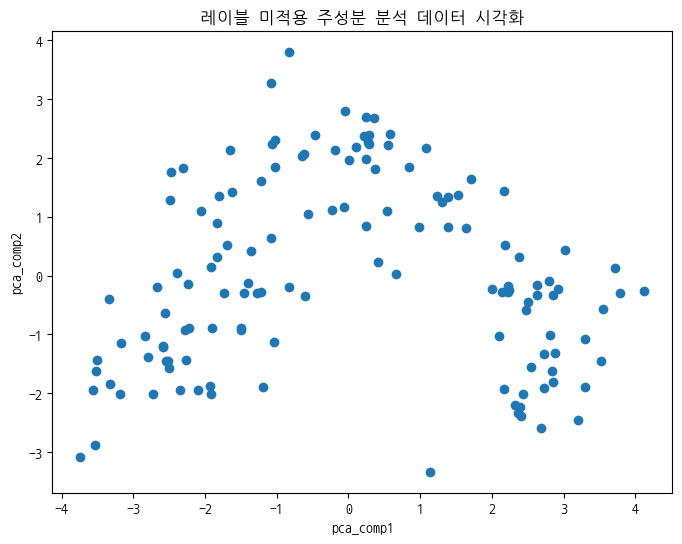

In [9]:
plt.figure(figsize=(8, 6))
# 레이블이 적용되지 않은 경우에는 각 데이터가 어떤 와인 클래스를 나타내는지 알 수 없다.
plt.scatter(x=x_train_df.pca_comp1, y=x_train_df.pca_comp2, marker='o')
plt.title('레이블 미적용 주성분 분석 데이터 시각화')
plt.xlabel('pca_comp1')
plt.ylabel('pca_comp2')
plt.show()

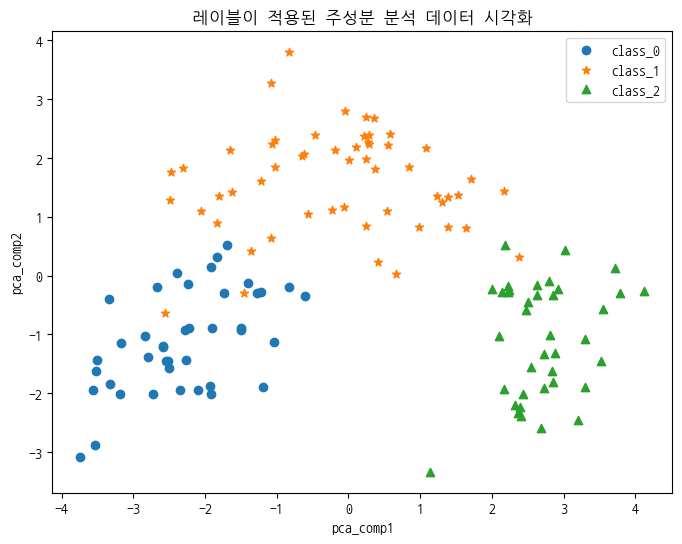

In [10]:
plt.figure(figsize=(8, 6))
# 레이블이 적용되면 각 데이터가 어떤 와인 클래스를 나타내는지 알 수 있다.

# 레이블 별로 데이터를 분할한다.
df_0 = x_train_df[x_train_df.label == 0]
df_1 = x_train_df[x_train_df.label == 1]
df_2 = x_train_df[x_train_df.label == 2]

# 레이블 별로 분할된 데이터의 첫 번째 주성분 벡터를 추출한다.
pca_x0 = df_0.pca_comp1
pca_x1 = df_1.pca_comp1
pca_x2 = df_2.pca_comp1

# 레이블 별로 분할된 데이터의 두 번째 주성분 벡터를 추출한다.
pca_y0 = df_0.pca_comp2
pca_y1 = df_1.pca_comp2
pca_y2 = df_2.pca_comp2

# 레이블 이름을 지정한다.
label0 = raw_data.target_names[0]
label1 = raw_data.target_names[1]
label2 = raw_data.target_names[2]

# 산포도를 그린다.
plt.scatter(x=pca_x0, y=pca_y0, marker='o', label=label0)
plt.scatter(x=pca_x1, y=pca_y1, marker='*', label=label1)
plt.scatter(x=pca_x2, y=pca_y2, marker='^', label=label2)

plt.title('레이블이 적용된 주성분 분석 데이터 시각화')
plt.xlabel('pca_comp1')
plt.ylabel('pca_comp2')
plt.legend()
plt.show()

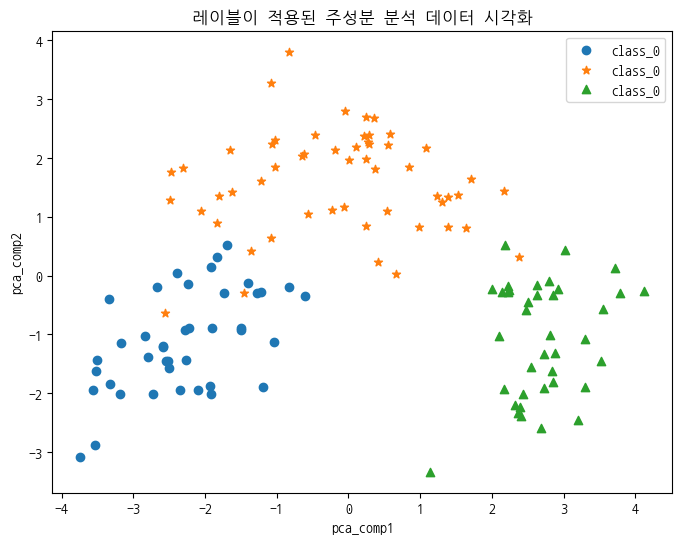

In [11]:
# 위 셀의 시각화 코드를 반복문을 사용해서 만든다.
plt.figure(figsize=(8, 6))
markers = ['o', '*', '^']

for index, marker in enumerate(markers):
    df_index = x_train_df[x_train_df.label == index] # 레이블 별로 데이터를 분할한다.
    x = df_index.pca_comp1 # 레이블 별로 분할된 데이터의 첫 번째 주성분 벡터를 추출한다.
    y = df_index.pca_comp2 # 레이블 별로 분할된 데이터의 두 번째 주성분 벡터를 추출한다.
    label = raw_data.target_names[0] # 레이블 이름을 지정한다.
    plt.scatter(x=x, y=y, marker=marker, label=label) # 산포도를 그린다.

plt.title('레이블이 적용된 주성분 분석 데이터 시각화')
plt.xlabel('pca_comp1')
plt.ylabel('pca_comp2')
plt.legend()
plt.show()

주성분 분석 적용 전 데이터 학습

In [12]:
# 모델 생성 후 데이터 학습
from sklearn.ensemble import RandomForestClassifier # 앙상블 랜덤 포레스트 알고리즘을 사용하기 위해 import 한다.
# 앙상블의 랜덤 포레스트도 모델을 만든다.
clf = RandomForestClassifier(max_depth=2, random_state=0)
# 표준화된 학습 데이터와 학습 데이터에 따른 레이블 데이터로 앙상블 랜덤 포레스트 모델을 학습시킨다.
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [13]:
# predict() 메소드의 인수로 표준화된 테스트 데이터를 넘겨서 예측한다.
predict = clf.predict(x_test)
print(predict)

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0]


In [14]:
# 혼동 행렬
# confusion_matrix() 메소드의 인수를 테스트 데이터의 실제값, 예측값 순서로 넘겨서 혼동 행렬를 만든다.
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[18  0  0]
 [ 1 16  0]
 [ 0  0 10]]


In [15]:
# 분류 리포트
# classification_report() 메소드의 인수를 테스트 데이터의 실제값, 예측값 순서로 넘겨서 분류 리포트를 만든다.
# target_names 속성으로 분류 리포트에 레이블의 실제값을 출력할 수 있다.
# class_report = classification_report(y_test, predict, target_names=raw_data.target_names) 
class_report = classification_report(y_test, predict, target_names=['A', 'B', 'C']) 
print(class_report)

              precision    recall  f1-score   support

           A       0.95      1.00      0.97        18
           B       1.00      0.94      0.97        17
           C       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



주성분 분석 적용 후 데이터 학습

In [16]:
# 표준화된 학습 데이터를 주성분 분석을 적용한 데이터와 학습 데이터에 따른 레이블 데이터를 앙상블 랜덤 포레스트 모델을 학습시킨다.
clf.fit(x_train_pca, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [17]:
# predict() 메소드의 인수로 표준화된 테스트 데이터를 넘겨서 예측한다.
predict = clf.predict(x_test_pca)
print(predict)

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 0 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0]


In [18]:
# 혼동 행렬
# confusion_matrix() 메소드의 인수를 테스트 데이터의 실제값, 예측값 순서로 넘겨서 혼동 행렬를 만든다.
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[18  0  0]
 [ 1 16  0]
 [ 1  0  9]]


In [19]:
# 분류 리포트
# classification_report() 메소드의 인수를 테스트 데이터의 실제값, 예측값 순서로 넘겨서 분류 리포트를 만든다.
# target_names 속성으로 분류 리포트에 레이블의 실제값을 출력할 수 있다.
# class_report = classification_report(y_test, predict, target_names=raw_data.target_names) 
class_report = classification_report(y_test, predict, target_names=['A', 'B', 'C']) 
print(class_report)

              precision    recall  f1-score   support

           A       0.90      1.00      0.95        18
           B       1.00      0.94      0.97        17
           C       1.00      0.90      0.95        10

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



PCA를 적용한 데이터의 정확도가 96%로 나타나는데, 이는 PCA 적용 이전보다 2%정도 줄어든 정확도를 보여준다.  
PCA 적용 이전에는 13차원 데이터였는데, 이를 무려 11차원이나 줄여 2차원 데이터로 줄였는데도 정확도는 약 2% 정도의 감소로밖에 이어지지 않았다. 학습 비용을 고려할 때, 차원 축소를 이용하면 학습 비용 대비 정확도 감소는 적어서 효율적이라 볼 수 있다.

실제로 고차원 데이터의 경우, 시스템의 리소스가 부족해 학습이 어려운 경우 경우가 있는데 차원 축소는 이러한 문제를 해결해 준다.